# Predictive Analytics

## Decision Trees

Easy explanation on how they work [here](https://prateekvjoshi.com/2016/03/22/how-are-decision-trees-constructed-in-machine-learning/) <br>
Sklearn tutorial [here](http://dataaspirant.com/2017/02/01/decision-tree-algorithm-python-with-scikit-learn/)

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn import cross_validation
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

from exampleDatasets.utilities import visualize_classifier

In [8]:
input_file = './exampleDatasets/data_decision_trees.txt'
data = np.loadtxt(input_file, delimiter = ',')
X, y = data[:, :-1], data[:, -1]

In [10]:
pd.DataFrame(X).head()

,0,1
0,4.86,4.87
1,4.69,5.37
2,3.82,5.71
3,2.58,9.88
4,8.30,5.36


In [13]:
class_0 = np.array(X[y == 0])
class_1 = np.array(X[y == 1])

In [14]:
pd.DataFrame(y).head()

,0
0,0.0
1,0.0
2,0.0
3,1.0
4,1.0


Text(0.5,1,'Input data')

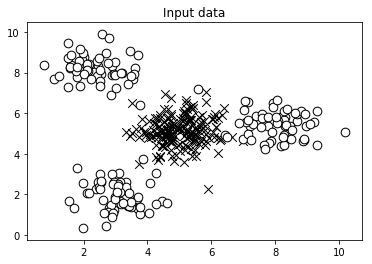

In [17]:
plt.figure()
plt.scatter(class_0[:, 0], class_0[:, 1], 
            s = 75, facecolors = 'black',
            edgecolors = 'black', linewidth = 1, marker = 'x')
plt.scatter(class_1[:, 0], class_1[:, 1],
           s = 75, facecolors = 'white',
           edgecolors = 'black', linewidth = 1, marker = 'o')
plt.title('Input data')

We are plotting the different classes of data here

In [5]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(
                            X, y, test_size = 0.25, random_state = 5)

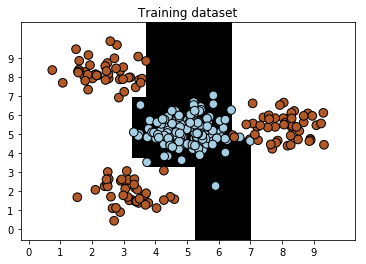

In [6]:
classifier = DecisionTreeClassifier(criterion = 'gini',
                                    splitter = 'best',
                                    max_depth = 4,
                                    min_samples_split = 2,
                                    min_samples_leaf = 1,
                                    min_weight_fraction_leaf = 0,
                                    max_features = None,
                                    random_state = 0,
                                    max_leaf_nodes = None,
                                    min_impurity_decrease = 0.0,
                                    min_impurity_split = None, 
                                    class_weight = None, 
                                    presort = False)
classifier.fit(X_train, y_train)
visualize_classifier(classifier, X_train, y_train, 'Training dataset')

criterion: It defines the function to measure the quality of a split. Sklearn supports “gini” criteria for Gini Index & “entropy” for Information Gain. By default, it takes “gini” value. <br>
splitter: It defines the strategy to choose the split at each node. Supports “best” value to choose the best split & “random” to choose the best random split. By default, it takes “best” value.<br>
max_features: It defines the no. of features to consider when looking for the best split. We can input integer, float, string & None value.<br>
If an integer is inputted then it considers that value as max features at each split.<br>
If float value is taken then it shows the percentage of features at each split.<br>
If “auto” or “sqrt” is taken then max_features=sqrt(n_features).<br>
If “log2” is taken then max_features= log2(n_features).<br>
If None, then max_features=n_features. By default, it takes “None” value.<br>
max_depth: The max_depth parameter denotes maximum depth of the tree. It can take any integer value or None. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. By default, it takes “None” value.<br>
min_samples_split: This tells above the minimum no. of samples reqd. to split an internal node. If an integer value is taken then consider min_samples_split as the minimum no. If float, then it shows percentage. By default, it takes “2” value.<br>
min_samples_leaf: The minimum number of samples required to be at a leaf node. If an integer value is taken then consider min_samples_leaf as the minimum no. If float, then it shows percentage. By default, it takes “1” value.<br>
max_leaf_nodes: It defines the maximum number of possible leaf nodes. If None then it takes an unlimited number of leaf nodes. By default, it takes “None” value.<br>
min_impurity_split: It defines the threshold for early stopping tree growth. A node will split if its impurity is above the threshold otherwise it is a leaf.

In [7]:
class_names = ['Class-0', 'Class-1']
print('\n' + '#' * 40)
print('\nClassifier performance on training dataset \n')
print(classification_report(y_train, classifier.predict(X_train),
                           target_names = class_names))
print('#' * 40 + '\n')
print('#' * 40)
print('\nClassifier performance on test dataset \n')
print(classification_report(y_test, classifier.predict(X_test),
                           target_names = class_names))
print('#' * 40 + '\n')


########################################

Classifier performance on training dataset 

             precision    recall  f1-score   support

    Class-0       0.99      1.00      1.00       137
    Class-1       1.00      0.99      1.00       133

avg / total       1.00      1.00      1.00       270

########################################

########################################

Classifier performance on test dataset 

             precision    recall  f1-score   support

    Class-0       0.93      1.00      0.97        43
    Class-1       1.00      0.94      0.97        47

avg / total       0.97      0.97      0.97        90

########################################



A good model will have high precision and recall, but it is usually a trade-off between the 2. f1-score characterizes that. It is the harmonic mean of precision and recall.

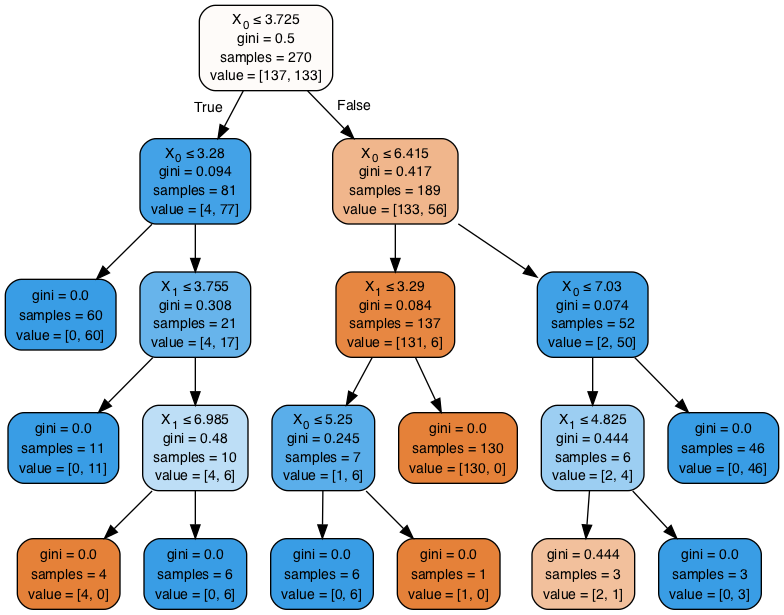

In [8]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(classifier,
                out_file = dot_data,
                max_depth = None,
                feature_names = None,
                class_names = None,
                label = 'all', 
                filled = True,
                leaves_parallel = False,
                impurity = True, 
                node_ids = False, 
                proportion = False, 
                rotate = False, 
                rounded = True, 
                special_characters = True, 
                precision = 3)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


The ‘value’ row in each node tells us how many of the observations that were sorted into that node fall into each of our three categories. 

The biggest drawback to decision trees is that the split it makes at each node will be optimized for the dataset it is fit to. This splitting process will rarely generalize well to other data. However, we can generate huge numbers of these decision trees, tuned in slightly different ways, and combine their predictions to create some of our best models today.

# Random Forests

In [11]:
import argparse

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn import cross_validation

from exampleDatasets.utilities import visualize_classifier

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


argparse helps build a command line argument list, can ignore for now

In [12]:
input_file = './exampleDatasets/data_random_forests.txt'

In [13]:
data = np.loadtxt(input_file, delimiter = ',')
X, y = data[:, :-1], data[:, -1]

In [16]:
class_0 = np.array(X[y == 0])
class_1 = np.array(X[y == 1])
class_2 = np.array(X[y == 2])

visualize the dataset first

Text(0.5,1,'Input data')

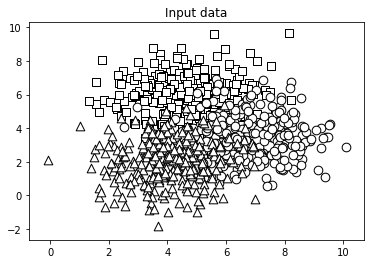

In [18]:
plt.figure()
plt.scatter(class_0[:, 0], class_0[:, 1], s = 75, facecolors = 'white',
            edgecolors = 'black', linewidth = 1, marker = 's')
plt.scatter(class_1[:, 0], class_1[:, 1], s = 75, facecolors = 'white',
            edgecolors = 'black', linewidth = 1, marker = 'o')
plt.scatter(class_2[:, 0], class_2[:, 1], s = 75, facecolors = 'white',
            edgecolors = 'black', linewidth = 1, marker = '^')
plt.title('Input data')

In [20]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(
                                    X, y, test_size = 0.25, random_state = 5)

In [34]:
classifier = RandomForestClassifier(n_estimators = 100, # Number of trees
                                    criterion = 'gini', 
                                    max_depth = 4, # Levels in each tree
                                    max_features = 'auto',  
                                    random_state = 0, 
                                    verbose = 0)

In [35]:
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

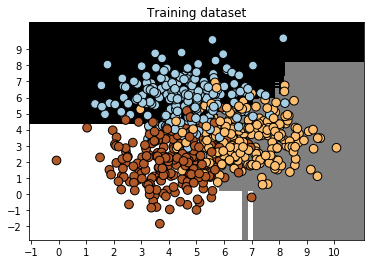

In [37]:
visualize_classifier(classifier, X_train, y_train, 'Training dataset')

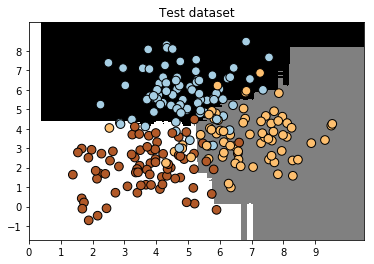

In [38]:
y_test_pred = classifier.predict(X_test)
visualize_classifier(classifier, X_test, y_test, 'Test dataset')

In [39]:
class_names = ['Class-0', 'Class-1', 'Class-2']
print("\n" + "#" * 40)
print("\nClassifier performance on training dataset\n")
print(classification_report(y_train, classifier.predict(X_train),
    target_names = class_names))
print("#" * 40 + "\n")
print("#" * 40)
print("\nClassifier performance on test dataset\n")
print(classification_report(y_test, y_test_pred,
    target_names = class_names))
print("#" * 40 + "\n")


########################################

Classifier performance on training dataset

             precision    recall  f1-score   support

    Class-0       0.91      0.86      0.88       221
    Class-1       0.84      0.87      0.86       230
    Class-2       0.86      0.87      0.86       224

avg / total       0.87      0.87      0.87       675

########################################

########################################

Classifier performance on test dataset

             precision    recall  f1-score   support

    Class-0       0.92      0.85      0.88        79
    Class-1       0.86      0.84      0.85        70
    Class-2       0.84      0.92      0.88        76

avg / total       0.87      0.87      0.87       225

########################################



Note that we always have only 2 dimensions in our toy sets. In reality we can maybe try doing a PCA then trying to graph our classification

# Extremely Random Forests

In [40]:
erf_classifier = ExtraTreesClassifier(n_estimators = 100,
                                     max_depth = 4,
                                     random_state = 0)

In [43]:
erf_classifier.fit(X_train, y_train)
y_test_pred_erf = erf_classifier.predict(X_test)

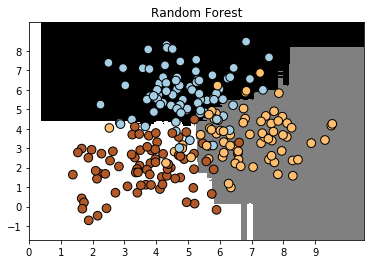

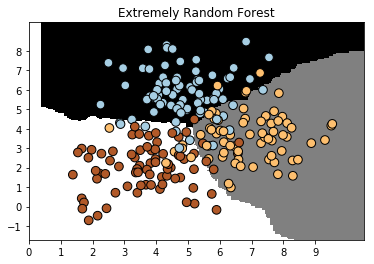

In [49]:
visualize_classifier(classifier, X_test, y_test, 'Random Forest')
visualize_classifier(erf_classifier, X_test, y_test, 'Extremely Random Forest')

## Confidence values 

In [50]:
test_datapoints = np.array([[5, 5], [3, 6], [6, 4], [7, 2], [4, 4],
   [5, 2]])

In [53]:
for datapoint in test_datapoints:
    probabilities = classifier.predict_proba([datapoint])[0]
    predicted_class = "Class-" + str(np.argmax(probabilities))
    print('/nDatapoint: {}'.format(datapoint))
    print('Predicted class: {}'.format(predicted_class))

/nDatapoint: [5 5]
Predicted class: Class-0
/nDatapoint: [3 6]
Predicted class: Class-0
/nDatapoint: [6 4]
Predicted class: Class-1
/nDatapoint: [7 2]
Predicted class: Class-1
/nDatapoint: [4 4]
Predicted class: Class-2
/nDatapoint: [5 2]
Predicted class: Class-2


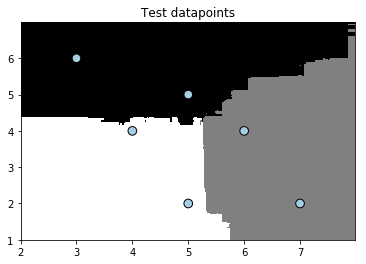

In [61]:
visualize_classifier(classifier, test_datapoints, 
                    [0] * len(test_datapoints),
                    'Test datapoints')

## Class imbalance

Remember the rubbish in rubbish out analogy. Classifiers work best when data is balanced, which means that there are equal number of data points for each class.


In [63]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import cross_validation
from sklearn.metrics import classification_report
from exampleDatasets.utilities import visualize_classifier

In [65]:
input_file = './exampleDatasets/data_imbalance.txt'
data = np.loadtxt(input_file, delimiter = ',')
X, y = data[:, :-1], data[:, -1]

In [66]:
class_0 = np.array(X[y == 0])
class_1 = np.array(X[y == 1])

Text(0.5,1,'Input data')

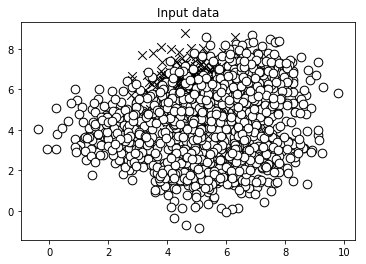

In [67]:
plt.figure()
plt.scatter(class_0[:, 0], class_0[:, 1], s=75, facecolors='black',
                           edgecolors='black', linewidth=1, marker='x')
plt.scatter(class_1[:, 0], class_1[:, 1], s=75, facecolors='white',
                           edgecolors='black', linewidth=1, marker='o')
plt.title('Input data')

In [68]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(
               X, y, test_size=0.25, random_state=5)

In [69]:
classifier = ExtraTreesClassifier(n_estimators = 100,
                                 max_depth = 4,
                                 random_state = 0,
                                 class_weight = 'balanced')

Here the balanced argument fixes this issue

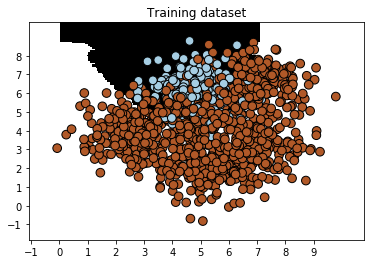

In [72]:
classifier.fit(X_train, y_train)
visualize_classifier(classifier, X_train, y_train, 'Training dataset')

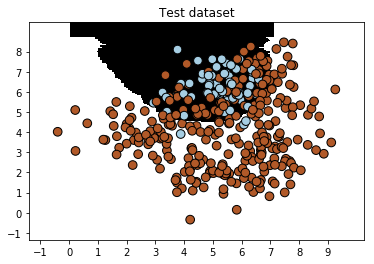

In [73]:
y_test_pred = classifier.predict(X_test)
visualize_classifier(classifier, X_test, y_test, 'Test dataset')

In [74]:
class_names = ['Class-0', 'Class-1']
print("\n" + "#" * 40)
print("\nClassifier performance on training dataset\n")
print(classification_report(y_train, classifier.predict(X_train),
   target_names = class_names))
print("#" * 40 + "\n")
print("#" * 40)
print("\nClassifier performance on test dataset\n")
print(classification_report(y_test, y_test_pred, target_names=class_names))
print("#" * 40 + "\n")



########################################

Classifier performance on training dataset

             precision    recall  f1-score   support

    Class-0       0.44      0.93      0.60       181
    Class-1       0.98      0.77      0.86       944

avg / total       0.89      0.80      0.82      1125

########################################

########################################

Classifier performance on test dataset

             precision    recall  f1-score   support

    Class-0       0.45      0.94      0.61        69
    Class-1       0.98      0.74      0.84       306

avg / total       0.88      0.78      0.80       375

########################################



In [75]:
classifier_imba = ExtraTreesClassifier(n_estimators = 100,
                                 max_depth = 4,
                                 random_state = 0)